<a href="https://colab.research.google.com/github/Kowsher/credit-scoring-model/blob/master/japan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [0]:

dataset = pd.read_csv("Japanese Credit Final.csv")

In [3]:
dataset.head()

,Attribute 1,Attribute 2,Attribute 3,Attribute 4,Attribute 5,Attribute 6,Attribute 7,Attribute 8,Attribute 9,Attribute 10,Attribute 11,Attribute 12,Attribute 13,Attribute 14,Attribute 15,Y
0,1,30.83,0.000,1,1,10,1,1.25,1,1,1,0,1,202,0,0
1,0,58.67,4.460,1,1,9,2,3.04,1,1,6,0,1,43,560,0
2,0,24.50,0.500,1,1,9,2,1.50,1,0,0,0,1,280,824,0
3,1,27.83,1.540,1,1,10,1,3.75,1,1,5,1,1,100,3,0
4,1,20.17,5.625,1,1,10,1,1.71,1,0,0,0,3,120,0,0


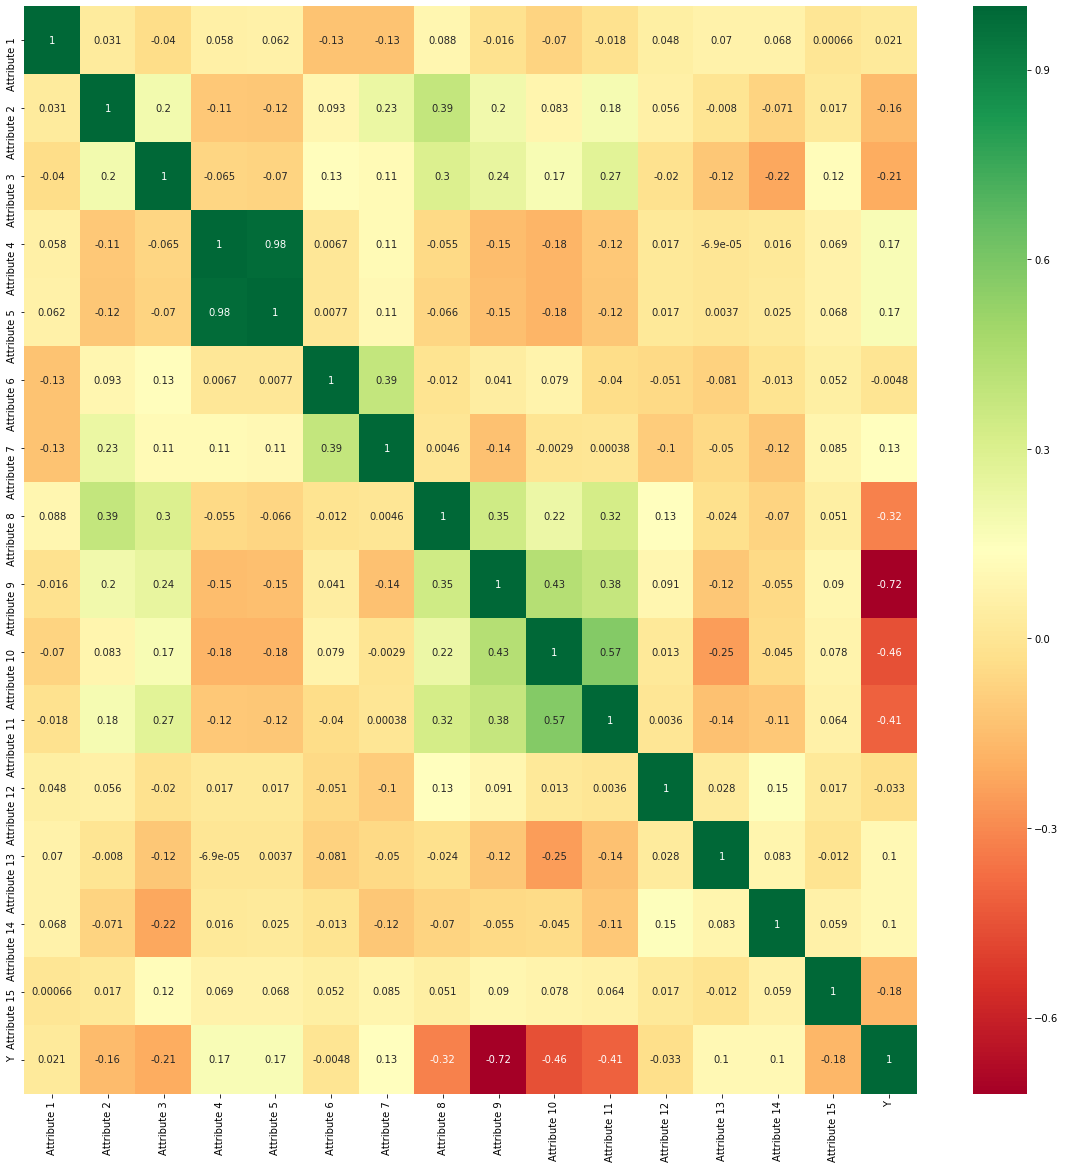

In [7]:

X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values   #target column i.e price range
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [0]:


dataset.drop(["Attribute 1", "Attribute 2", "Attribute 5", "Attribute 4", "Attribute 6", "Attribute 7", "Attribute 12", "Attribute 13", "Attribute 14"], axis = 1, inplace = True)
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values


In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
# Fitting Random Fresto Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [14]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')
cm1 = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
print("cm = ", cm1)
print("f1 = ", f1)

cm =  0.8115942028985508
f1 =  0.8083333333333333


In [0]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [16]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')
cm1 = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
print("cm = ", cm1)
print("f1 = ", f1)

cm =  0.8623188405797102
f1 =  0.8617307388071508


In [17]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')
cm1 = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
print("cm = ", cm1)
print("f1 = ", f1)

cm =  0.7681159420289855
f1 =  0.7490909090909091


In [18]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')
cm1 = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
print("cm = ", cm1)
print("f1 = ", f1)

cm =  0.8623188405797102
f1 =  0.8617307388071508


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)



# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')
cm1 = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
print("cm = ", cm1)
print("f1 = ", f1)

cm =  0.8333333333333334
f1 =  0.8293823576842445


In [21]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')
cm1 = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
print("cm = ", cm1)
print("f1 = ", f1)

cm =  0.8188405797101449
f1 =  0.8160490535857104


In [22]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

classifier = LinearDiscriminantAnalysis()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')
cm1 = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
print("cm = ", cm1)
print("f1 = ", f1)
print(cm)

cm =  0.8623188405797102
f1 =  0.8617307388071508
[[55  5]
 [14 64]]


In [24]:
# Artificial Neural Network

# Installing Theano
# pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
# Install Tensorflow from the website: https://www.tensorflow.org/versions/r0.12/get_started/os_setup.html

# Installing Keras
# pip install --upgrade keras

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd




# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 6))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 9, init = 'uniform', activation = 'relu'))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=6, units=6, kernel_initializer="uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=9, kernel_initializer="uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.





Epoch 1/100





552/552 [==============================] - 1s 2ms/step - loss: 0.6927 - acc: 0.5489
Epoch 2/100
552/552 [==============================] - 0s 159us/step - loss: 0.6885 - acc: 0.6014
Epoch 3/100
552/552 [==============================] - 0s 139us/step - loss: 0.6377 - acc: 0.8514
Epoch 4/100
552/552 [==============================] - 0s 156us/step - loss: 0.5407 - acc: 0.8406
Epoch 5/100
552/552 [==============================] - 0s 169us/step - loss: 0.4814 - acc: 0.8460
Epoch 6/100
552/552 [==============================] - 0s 153us/step - loss: 0.4318 - acc: 0.8551
Epoch 7/100
552/552 [==============================] - 0s 145us/step - loss: 0.3889 - acc: 0.8478
Epoch 8/100
552/552 [==============================] - 0s 156us/step - loss: 0.3620 - acc: 0.8569
Epoch 9/100
552/552 [==============================] - 0s 148us/step - loss: 0.3462 - acc: 0.8551
Epoch 10/100
552/552 [==============================] - 0s 143us/step - loss: 0.3381 - acc: 0.8623
Epoch 11/100


In [25]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')
cm1 = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
print("cm = ", cm1)
print("f1 = ", f1)
print(cm)

cm =  0.8623188405797102
f1 =  0.8590549911304628
[[49 11]
 [ 8 70]]


In [0]:
y1 = X_train[:, 0]
y2 = X_train[:, 1]
y3 = X_train[:, 2]
y4 = X_train[:, 3]
y5 = X_train[:, 4]
y6 = X_train[:, 5]




yt1 = X_test[:, 0]
yt2 = X_test[:, 1]
yt3 = X_test[:, 2]
yt4 = X_test[:, 3]
yt5 = X_test[:, 4]
yt6 = X_test[:, 5]



In [0]:



from scipy.optimize import curve_fit

def test_func1(X, a, b, c1, c2, c3, c4, c5, c6):
    y1, y2, y3, y4, y5, y6 = X

    return ((1/(b))*(a-c1*y1-c2*y2-c3*y3-c4*y4-c5*y5-c6*y6)) 
p0 = [2, 2, 2, 2, 2, 2, 2, 2]        # initial guesses
c,cov = curve_fit(test_func1, (y1, y2, y3, y4, y5, y6), y_train, p0)  # fit model


yxt = test_func1((yt1, yt2, yt3, yt4, yt5, yt6),c[0],c[1],c[2],c[3],c[4],c[5],c[6], c[7])
yx  = test_func1((y1, y2, y3, y4, y5, y6),c[0],c[1],c[2],c[3],c[4],c[5],c[6], c[7])


t1_data = []
for i in range(len(yxt)):
  if yxt[i]>0.4:
    t1_data.append(1)
  else:
    t1_data.append(0)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, t1_data)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, t1_data, average='macro')
cm1 = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
print("cm = ", cm1)
print(cm)
print("f1 = ", f1)